In [ ]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
%matplotlib inline

In [149]:
dice = Table().with_column('Face',np.arange(1,7))
dice.with_column('Probability',1/6)

Face,Probability
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


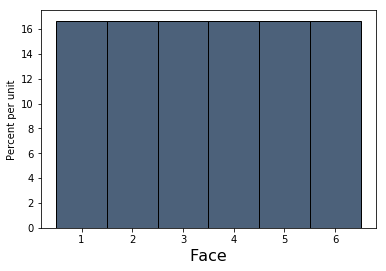

In [150]:
dice.hist('Face', bins=np.arange(0.5,7.5,1))

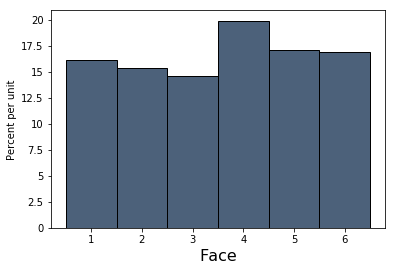

In [153]:
dice.sample(1000).hist("Face", bins=np.arange(0.5,7.5,1))

In [154]:
flights = Table.read_table('https://raw.githubusercontent.com/AUP-CS2091/class/master/week5/united_summer2015.csv')
flights

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [155]:
np.median(flights.column('Delay'))

2.0

In [165]:
np.median(flights.sample(100).column('Delay'))

3.5

In [166]:
delay_median_expr_size = 1000
delay_median_array = make_array()

for i in np.arange(delay_median_expr_size):
    delay_median_array = np.append(delay_median_array, np.median(flights.sample(100).column('Delay')))
    
delay_median_array

array([4. , 1. , 2.5, 3. , 4. , 3. , 2.5, 2. , 2. , 2. , 2. , 1.5, 3. ,
       2. , 4.5, 0. , 3.5, 2. , 4. , 4.5, 3. , 3.5, 3. , 2. , 3. , 5. ,
       5. , 4.5, 3. , 4.5, 2.5, 3. , 0. , 4. , 4. , 1. , 0. , 5.5, 6. ,
       1. , 3.5, 2. , 2. , 3. , 3. , 5. , 1.5, 0. , 1. , 2.5, 3. , 4. ,
       2. , 2. , 4.5, 2.5, 3. , 2. , 2.5, 0. , 4. , 4. , 2.5, 1.5, 6. ,
       2. , 6.5, 0. , 3. , 2. , 1. , 3. , 1. , 3.5, 2. , 4.5, 1. , 2.5,
       4. , 3. , 4. , 2. , 2. , 4. , 3. , 1. , 3. , 2. , 1. , 0. , 3. ,
       2.5, 6. , 2.5, 4. , 1. , 4. , 3. , 3.5, 1.5, 0.5, 3. , 3. , 4. ,
       4. , 3. , 3. , 3. , 5.5, 3.5, 0.5, 2. , 4. , 1. , 0. , 3. , 2. ,
       0. , 1. , 2. , 2. , 2.5, 3. , 1. , 2. , 3. , 2.5, 3.5, 4. , 0.5,
       5.5, 2. , 5.5, 0.5, 6. , 1.5, 3. , 1. , 1.5, 2.5, 3.5, 3. , 1. ,
       1. , 4. , 4. , 0. , 5. , 0. , 0.5, 4.5, 1. , 4.5, 0.5, 1.5, 5.5,
       4. , 2. , 4.5, 1.5, 2. , 3. , 2. , 3. , 5.5, 8.5, 1.5, 5.5, 3. ,
       2. , 1. , 2.5, 0. , 2. , 4. , 3.5, 6. , 3. , 2. , 0.5, 1.

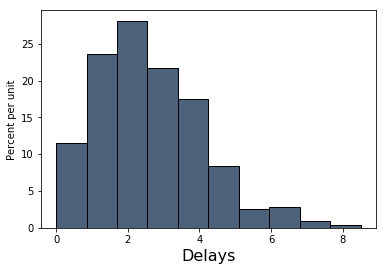

In [168]:
Table().with_column("Delays", delay_median_array).hist()

In [169]:
coin_proportions = make_array(0.5,0.5)
sample_proportions(50, coin_proportions)

array([0.52, 0.48])

In [174]:
swain_proportions = make_array(0.26,0.74)
number_of_black_people_on_panel = 8

sample_proportions(100,swain_proportions).item(0) * 100


24.0

In [175]:
swain_experiment_size = 1000
number_of_black_people_on_panel = make_array()
for i in np.arange(swain_experiment_size):
    number_of_black_people_on_panel = np.append(number_of_black_people_on_panel, sample_proportions(100,swain_proportions).item(0) * 100)
    
swain_table = Table().with_column('Number of black people on panel', number_of_black_people_on_panel)

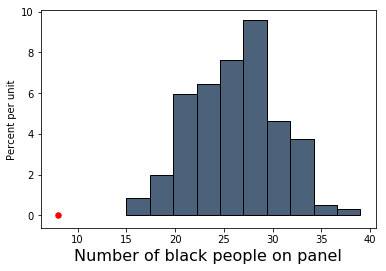

In [177]:
swain_table.hist()
plots.scatter(8,0,color="red",s=30)

In [182]:
number_of_black_people_on_panel_2 = make_array()
for i in np.arange(swain_experiment_size):
    number_of_black_people_on_panel_2 = np.append(number_of_black_people_on_panel_2, sample_proportions(100,swain_proportions).item(0) * 100 - 8)
    
swain_table_2 = Table().with_column('Number of black people on panel above the model', number_of_black_people_on_panel_2)

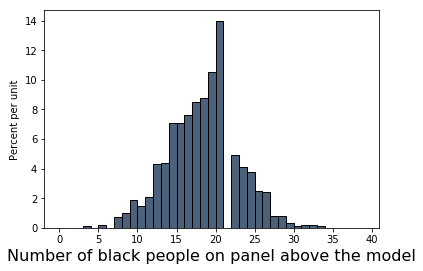

In [184]:
swain_table_2.hist(bins = np.arange(0,40,1))


In [193]:
pea_proportions = make_array(0.75,0.25)
np.abs((sample_proportions(929,pea_proportions) * 929).item(0) - 705)

3.0

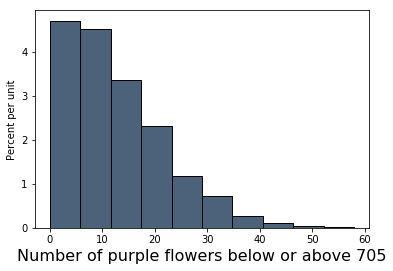

In [195]:
pea_expr_size = 10000
pea_purple_number = make_array()

for i in np.arange(pea_expr_size):
    pea_purple_number = np.append(pea_purple_number, np.abs((sample_proportions(929,pea_proportions) * 100).item(0) - 75))
    
Table().with_column("Perecent of purple flowers below or above 75", pea_purple_number).hist()

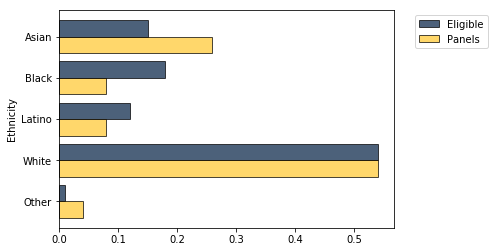

In [197]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury.barh(0)

In [201]:
sum(np.abs(jury.column(1)-jury.column(2)))/2

0.14

In [203]:
eligible_proportion = jury.column(1)

sum(np.abs(jury.column(1)-sample_proportions(1500,eligible_proportion)))/2

0.013333333333333317

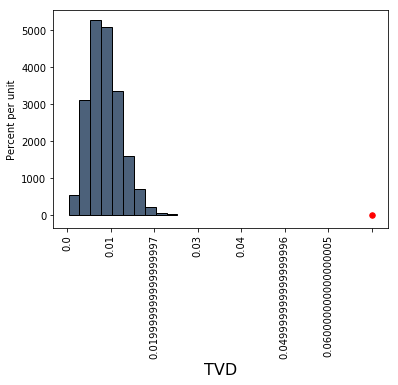

In [210]:
jury_expr_size = 10000
jury_proportions_array = make_array()

for i in np.arange(jury_expr_size):
    jury_proportions_array = np.append(jury_proportions_array, np.abs(sum(np.abs(jury.column(1)-sample_proportions(1500,eligible_proportion)))/2))
    
Table().with_column("TVD", jury_proportions_array).hist()
plots.scatter(0.14,0,color="red",s=30)